# 📊 Customer Purchase Behavior Analysis – Diwali Campaign

### 🎯 Objective:
To analyze customer purchase behavior during the Diwali season using sales data. The goal is to derive actionable insights on sales patterns based on demographics such as gender, age group, marital status, state, and product categories using Python libraries such as pandas, seaborn, and matplotlib.


In [8]:
# import python libraries

import numpy as np
import pandas as pd               # cleaning the data
import matplotlib.pyplot as plt   # visualization data
%matplotlib inline
import seaborn as sns             # visualization


In [9]:
# import csv file
df = pd.read_csv(r'C:\Users\HP\Downloads\python project\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [12]:
df.shape

(11251, 15)

In [21]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [33]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [37]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [39]:
# drop null values
df.dropna(inplace=True)

In [43]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [45]:
df['Amount'].dtypes

dtype('int32')

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [49]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [51]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [55]:
# use describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

#### Gender

In [144]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df, hue = 'Gender', palette={'F': 'pink', 'M': 'skyblue'}, legend=False)


for bars in ax.containers:
    ax.bar_label(bars)
    

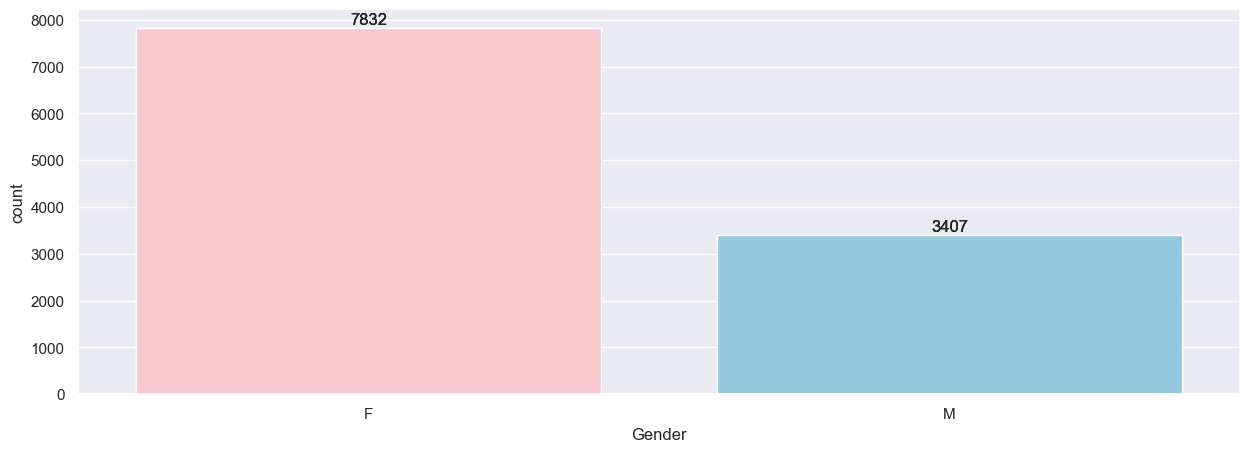

In [146]:
plt.show()

In [16]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount',data = sales_gen, hue = 'Gender',dodge = False, palette ={'F':'pink', 'M':'Skyblue'}, legend = False)

<Axes: xlabel='Gender', ylabel='Amount'>

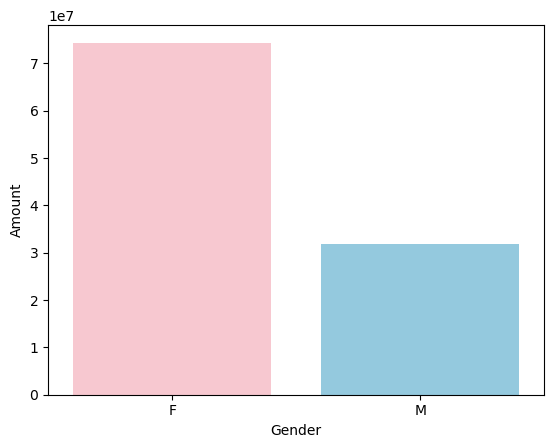

In [18]:
plt.show()

#### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

In [94]:
### Pie Chart: Total Amount Contribution by Gender


gender_pie = df.groupby('Gender', as_index=False)['Amount'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    gender_pie['Amount'],          # Values (slices) of the pie
    labels=gender_pie['Gender'],   # Labels on each slice
    autopct='%1.1f%%',             # Show percentage with 1 decimal
    startangle=90,                 # Rotate the pie so it starts at top
    colors=['#66b3ff','#ff9999']   # Custom colors for Female/Male
)
plt.title('Gender-wise Sales Distribution')
plt.axis('equal') 



(-1.0999995495900738, 1.099999000763749, -1.099998105659699, 1.099999909793319)

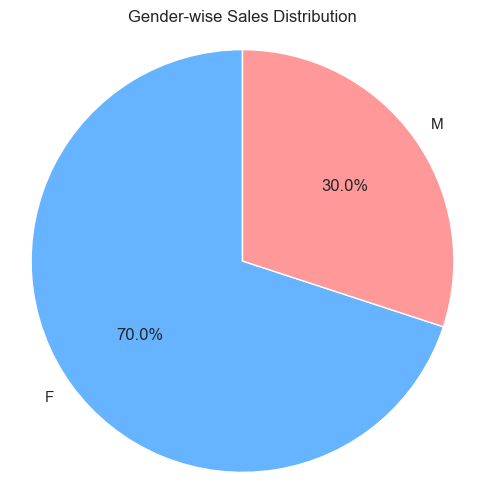

In [96]:
plt.show()

### Age

In [90]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)


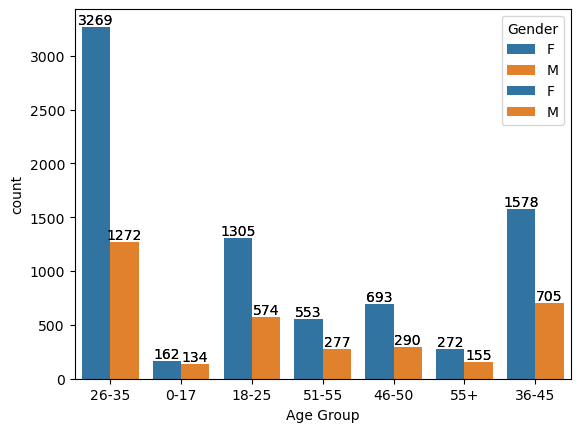

In [92]:
plt.show()

In [90]:
# Total Amount vs Age Group

age_data = df.groupby('Age Group', as_index =False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = age_data, hue='Age Group',       
    dodge=False,
    palette='Set2',          # Soft colorful palette
    legend=False             # Optional: hides color box
)

<Axes: xlabel='Age Group', ylabel='Amount'>

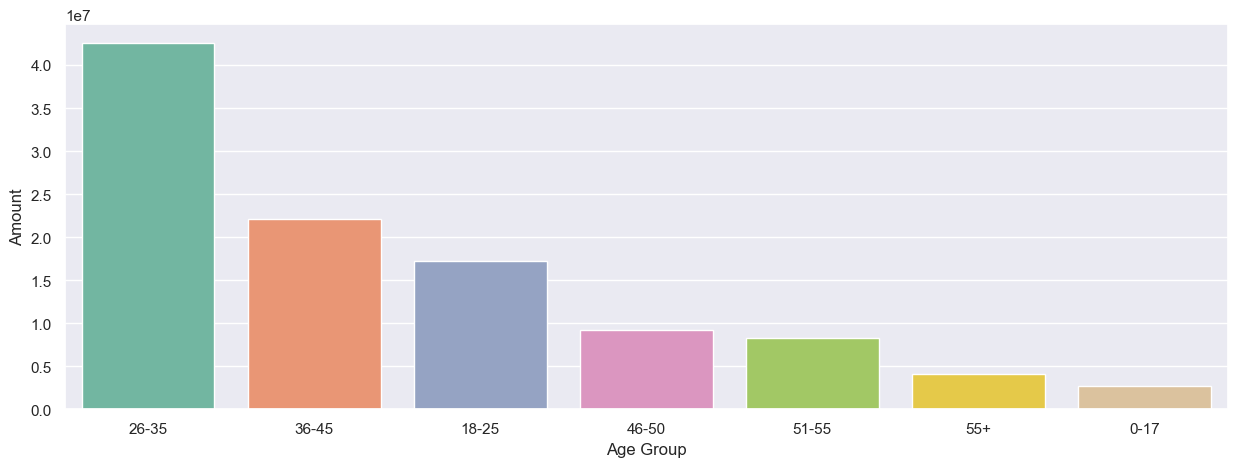

In [92]:
plt.show()

### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State¶

In [100]:
# total number of orders from top 10 states

sales_state = df.groupby('State', as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'State', y = 'Orders', data = sales_state, hue = 'State', dodge = False, palette = 'Set2', legend = False)

# Add annotations (values on top of bars)
for bars in ax.containers:
    ax.bar_label(bars)

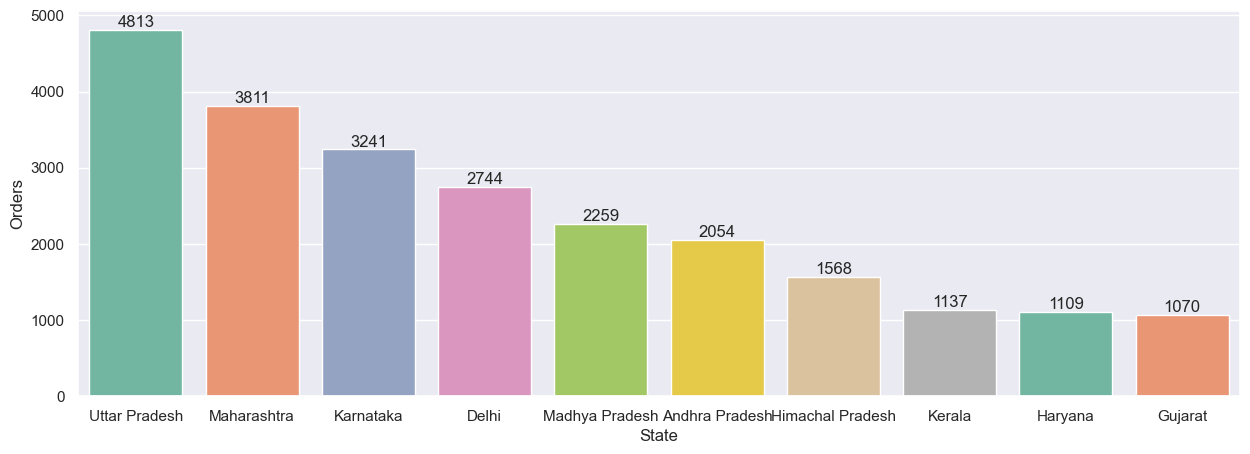

In [102]:
plt.show()

In [104]:
# total amount/sales from top 10 states

sales_state2 = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'State', y = 'Amount',data = sales_state2, hue = 'State', dodge = False, palette = 'Set2', legend = False)

# Add annotations (values on top of bars)
for bars in ax.containers:
    ax.bar_label(bars)



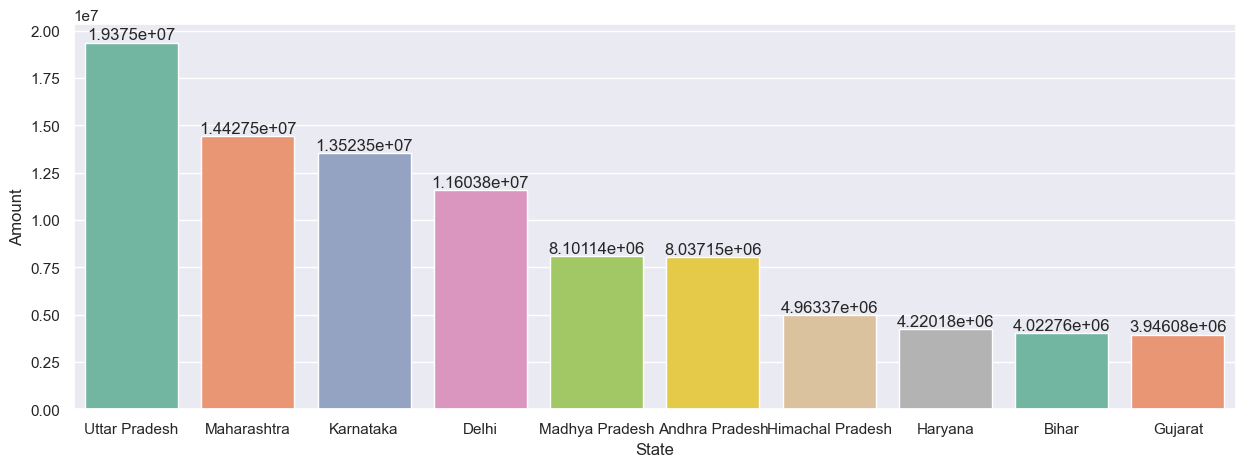

In [106]:
plt.show()

#### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status¶

In [53]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue = 'Marital_Status', palette = 'Set2', legend = False)

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

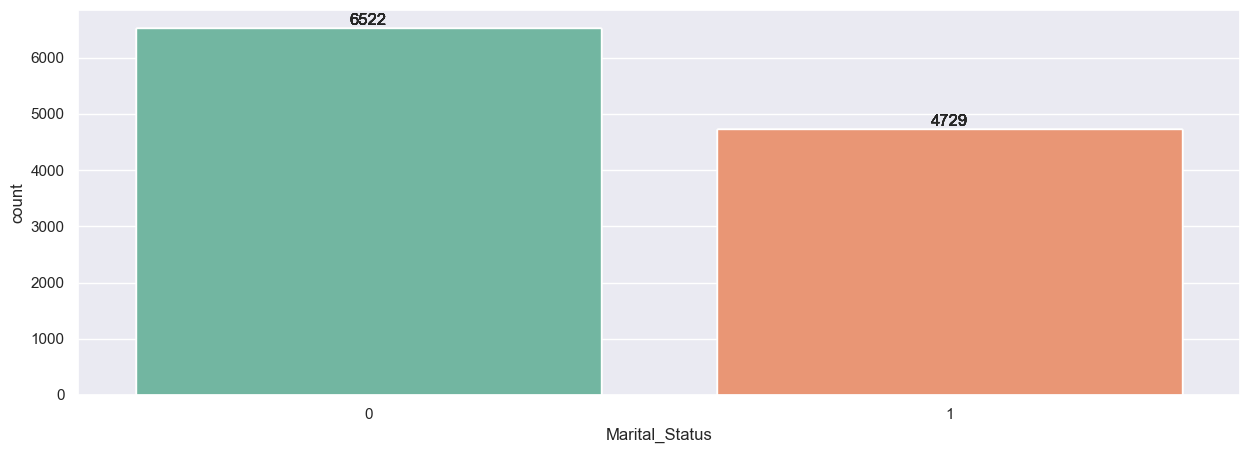

In [55]:
plt.show()

In [108]:
marital_data = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data = marital_data, x= 'Marital_Status', y = 'Amount', hue = 'Gender')

# Add annotations (values on top of bars)
for bars in ax.containers:
    ax.bar_label(bars)

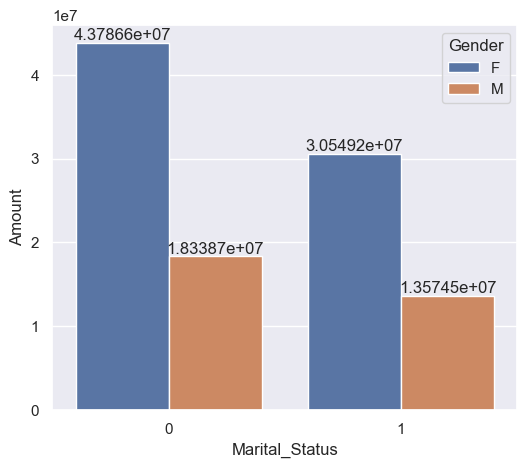

In [110]:
plt.show()

#### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power



### Occupation

In [79]:
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation', dodge= False, palette = 'Set2', legend = False) 

for bars in ax.containers:
    ax.bar_label(bars)

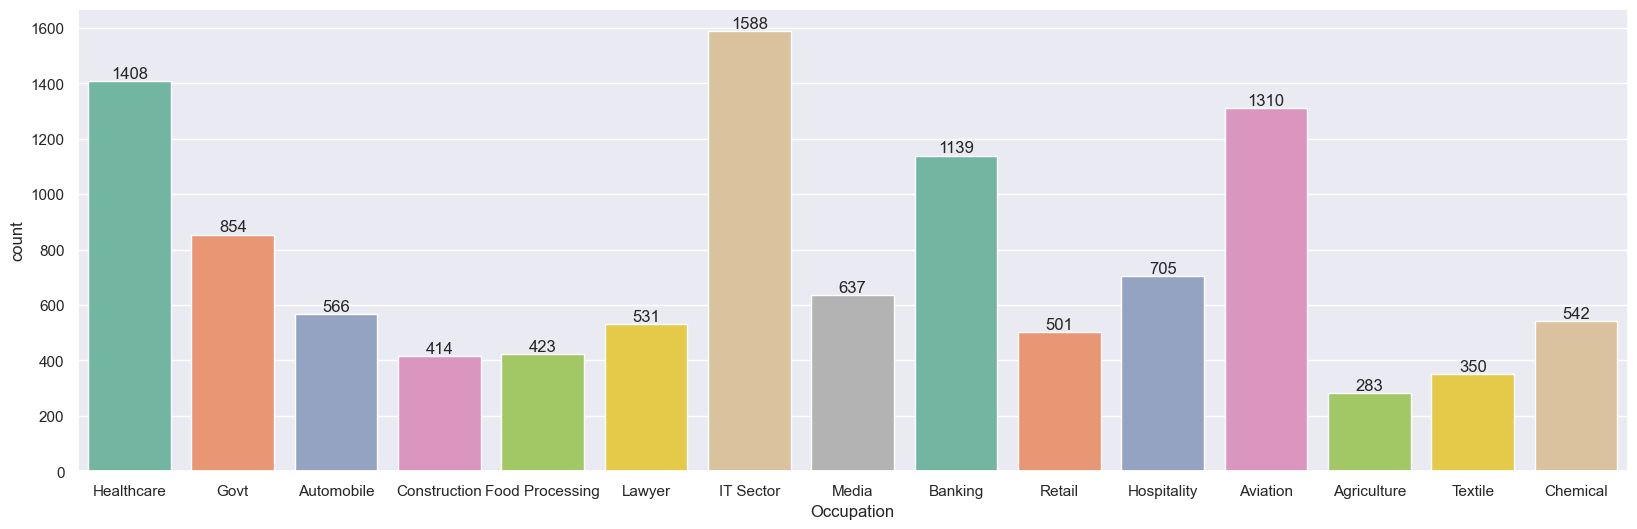

In [81]:
plt.show()

In [112]:
occupation_data = df.groupby('Occupation', as_index= False)['Amount'].sum().sort_values(by ='Amount',ascending= False)
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.barplot(data = occupation_data , x = 'Occupation', y = 'Amount', hue = 'Occupation', dodge = False,palette = 'Set2',legend = False)

# Add annotations (values on top of bars)
for bars in ax.containers:
    ax.bar_label(bars)

            

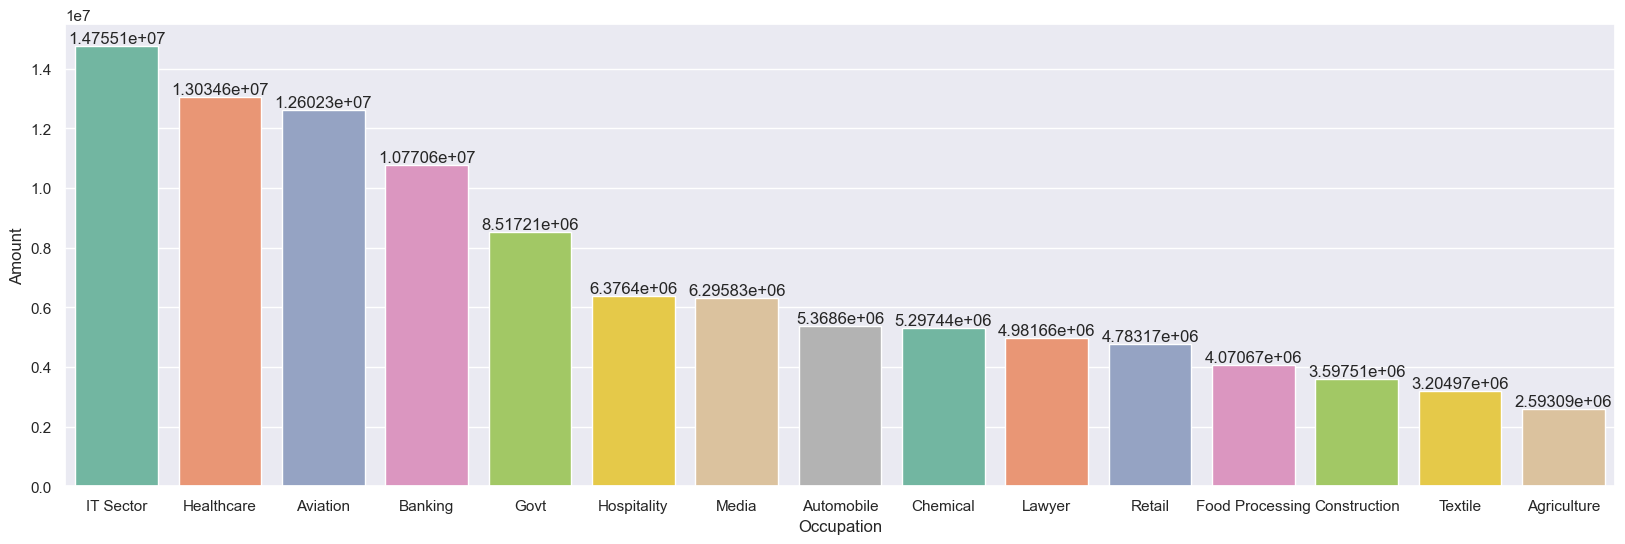

In [114]:
plt.show()

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

In [106]:
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.countplot(data = df, x= 'Product_Category', hue = 'Product_Category', dodge = False, palette = 'Set2', legend = False)

for bars in ax.containers:
    ax.bar_label(bars)

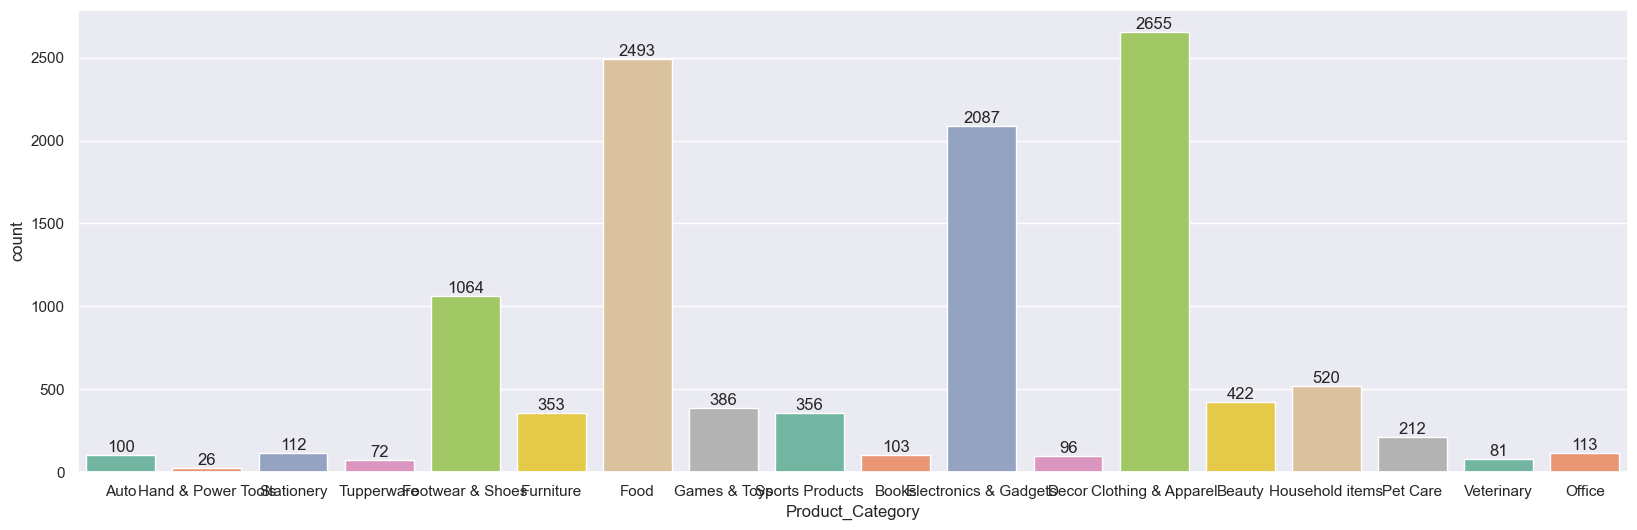

In [108]:
plt.show()

In [116]:
category_data = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})                        
ax = sns.barplot(data = category_data, x = 'Product_Category', y = 'Amount',hue = 'Product_Category',dodge = False, palette = 'Set2',legend = False)  

# Add annotations (values on top of bars)
for bars in ax.containers:
    ax.bar_label(bars)

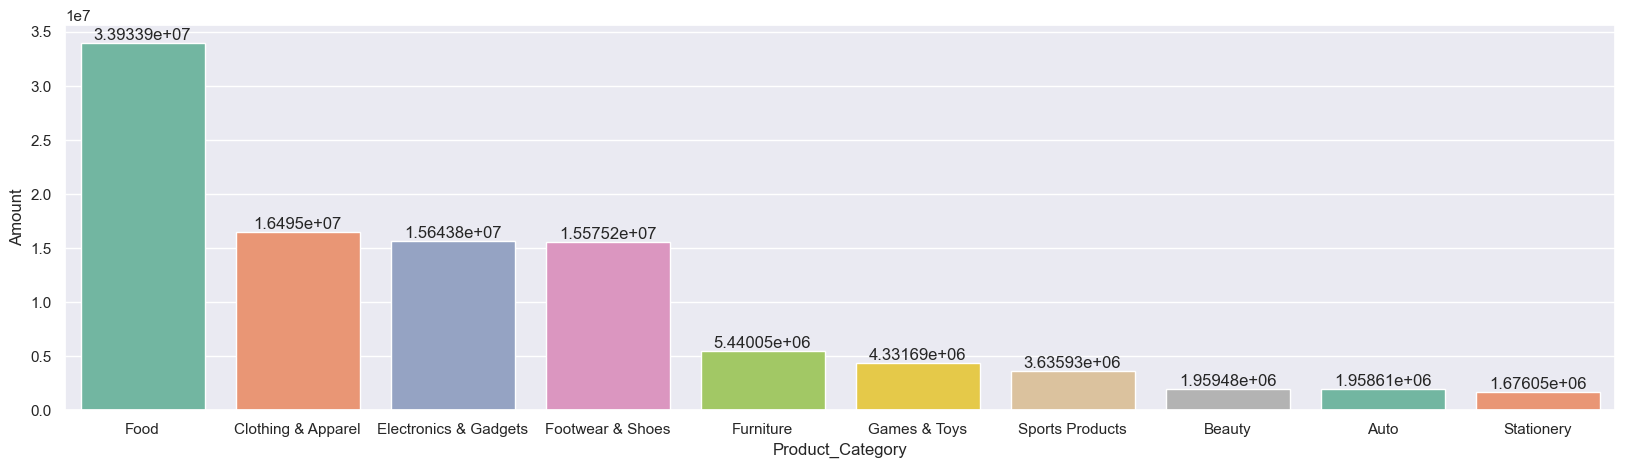

In [118]:
plt.show()

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

In [120]:
product_data = df.groupby('Product_ID', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = product_data, x = 'Product_ID',y= 'Orders',hue = 'Product_ID', dodge = False, palette = 'Set2', legend = False)

# Add annotations (values on top of bars)
for bars in ax.containers:
    ax.bar_label(bars)

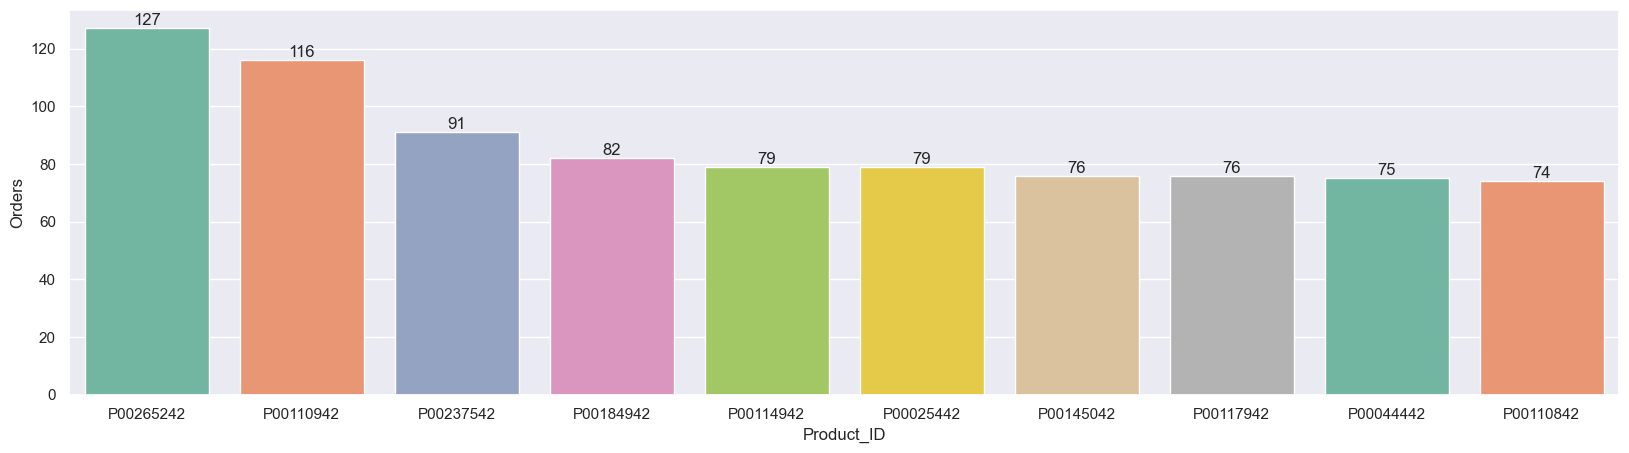

In [122]:
plt.show()

In [127]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

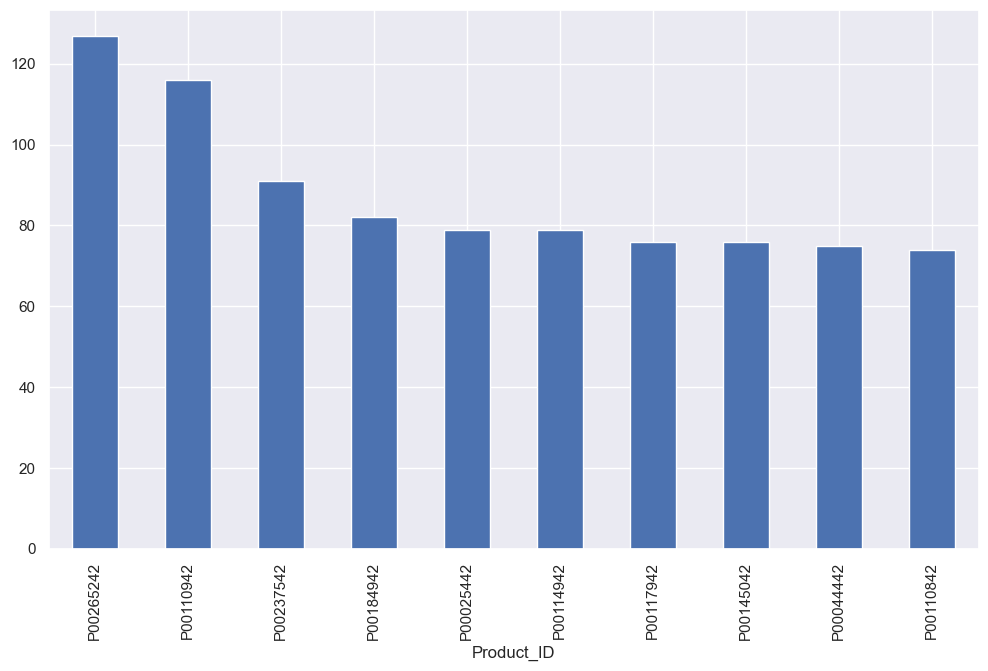

In [129]:
plt.show()

In [126]:
## Summary Table: Top 5 States by Total Amount and Orders

# Creating summary table
summary_state = df.groupby('State', as_index=False)[['Amount', 'Orders']].sum()
summary_state = summary_state.sort_values(by=['Amount', 'Orders'], ascending=False).head(5).reset_index(drop=True)

# Displaying the summary table
print("Top 5 States by Total Amount and Orders:")
summary_state.style.background_gradient(cmap='Blues')


Top 5 States by Total Amount and Orders:


,State,Amount,Orders
0,Uttar Pradesh,19374968.000000,4813
1,Maharashtra,14427543.000000,3811
2,Karnataka,13523540.000000,3241
3,Delhi,11603819.450000,2744
4,Madhya Pradesh,8101142.000000,2259


> 🔍 **Insights:**  
> - **Uttar Pradesh** had the highest total sales and orders, indicating strong buying power.  
> - **Maharashtra** and **Karnataka** followed closely in terms of performance.  
> - This summary helps identify key regional markets for future targeted campaigns.


## Conclusion:


 ***Married women aged 26–35 years from Uttar Pradesh, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation sectors are more likely to buy products from Food, Clothing, and Electronics categories.***


## Thank you!